# UNSUPERVISED_LEARNING_PROJECT:

# PART A : 

### DOMAIN: 

Automobile

### CONTEXT: 

The data concerns city-cycle fuel consumption in miles per gallon to be predicted in terms of 3 multivalued discrete and 5 
continuous attributes.

### DATA DESCRIPTION: 

cylinders: multi-valued discrete 

acceleration: continuous 

displacement: continuous 

model year: multi-valued discrete

horsepower: continuous 

origin: multi-valued discrete

weight: continuous 

car name: string (unique for each instance)

mpg: continuous

### PROJECT OBJECTIVE: 

To understand K-means Clustering by applying on the Car Dataset to segment the cars into various categories.

#### STEPS AND TASK:

##### Data Understanding & Exploration: 

A. Read ‘Car name.csv’ as a DataFrame and assign it to a variable. 

B. Read ‘Car-Attributes.json as a DataFrame and assign it to a variable. 

C. Merge both the DataFrames together to form a single DataFrame 

D. Print 5 point summary of the numerical features and share insights. 

##### 2. Data Preparation & Analysis:

A. Check and print feature-wise percentage of missing values present in the data and impute with the best suitable approach. 

B. Check for duplicate values in the data and impute with the best suitable approach. 

C. Plot a pairplot for all features.

D. Visualize a scatterplot for ‘wt’ and ‘disp’. Datapoints should be distinguishable by ‘cyl’. 

E. Share insights for Q2.d. 

F. Visualize a scatterplot for ‘wt’ and ’mpg’. Datapoints should be distinguishable by ‘cyl’. 

G. Share insights for Q2.f. 

H. Check for unexpected values in all the features and datapoints with such values. 

[Hint: ‘?’ is present in ‘hp’]

##### 3. Clustering: 
A. Apply K-Means clustering for 2 to 10 clusters. 

B. Plot a visual and find elbow point. 

C. On the above visual, highlight which are the possible Elbow points.

D. Train a K-means clustering model once again on the optimal number of clusters. 

E. Add a new feature in the DataFrame which will have labels based upon cluster value. 

F. Plot a visual and color the datapoints based upon clusters.

G. Pass a new DataPoint and predict which cluster it belongs to.


## 1. Data Understanding & Exploration: 

### A. Read ‘Car name.csv’ as a DataFrame and assign it to a variable. 

In [81]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import scipy.stats as stats
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from imblearn.over_sampling import SMOTE
from sklearn.preprocessing import LabelEncoder
from scipy.stats import zscore
from scipy.cluster.hierarchy import dendrogram, linkage
from scipy.cluster.hierarchy import fcluster
from sklearn.cluster import KMeans 
from sklearn.metrics import silhouette_samples, silhouette_score
import pandas as pd    
import matplotlib.pyplot as plt 
import seaborn as sns
%matplotlib inline 
sns.set(color_codes=True)
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')
from sklearn.model_selection import train_test_split

In [82]:
df1 = pd.read_csv('Car name.csv')

In [83]:
df1.head()

,car_name
0,chevrolet chevelle malibu
1,buick skylark 320
2,plymouth satellite
3,amc rebel sst
4,ford torino


In [84]:
print('The shape of the dataset:',df1.shape)

The shape of the dataset: (398, 1)


In [85]:
print('The datatype of the dataset:',df1.dtypes)

The datatype of the dataset: car_name    object
dtype: object


### B. Read ‘Car-Attributes.json as a DataFrame and assign it to a variable

In [86]:
df2 = pd.read_json ('Car-Attributes.json')

### C. Merge both the DataFrames together to form a single DataFrame

In [87]:
df = pd.concat([df1,df2],axis=1)
df.head()

,car_name,mpg,cyl,disp,hp,wt,acc,yr,origin
0,chevrolet chevelle malibu,18.0,8,307.0,130,3504,12.0,70,1
1,buick skylark 320,15.0,8,350.0,165,3693,11.5,70,1
2,plymouth satellite,18.0,8,318.0,150,3436,11.0,70,1
3,amc rebel sst,16.0,8,304.0,150,3433,12.0,70,1
4,ford torino,17.0,8,302.0,140,3449,10.5,70,1


In [88]:
print('The shape of the final dataset is:',df.shape)

The shape of the final dataset is: (398, 9)


In [89]:
df = df.drop('car_name', axis=1)
# Also replacing the categorical var with actual values
df['origin'] = df['origin'].replace({1: 'america', 2: 'europe', 3: 'asia'})
df.head()

,mpg,cyl,disp,hp,wt,acc,yr,origin
0,18.0,8,307.0,130,3504,12.0,70,america
1,15.0,8,350.0,165,3693,11.5,70,america
2,18.0,8,318.0,150,3436,11.0,70,america
3,16.0,8,304.0,150,3433,12.0,70,america
4,17.0,8,302.0,140,3449,10.5,70,america


'df' stores the final dataset.

### D. Print 5 point summary of the numerical features and share insights. 

In [90]:
print('The data type of each attribute: \n')
df.info()

The data type of each attribute: 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 398 entries, 0 to 397
Data columns (total 8 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   mpg     398 non-null    float64
 1   cyl     398 non-null    int64  
 2   disp    398 non-null    float64
 3   hp      398 non-null    object 
 4   wt      398 non-null    int64  
 5   acc     398 non-null    float64
 6   yr      398 non-null    int64  
 7   origin  398 non-null    object 
dtypes: float64(3), int64(3), object(2)
memory usage: 25.0+ KB


In [91]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
mpg,398.0,23.514573,7.815984,9.0,17.500,23.0,29.000,46.6
cyl,398.0,5.454774,1.701004,3.0,4.000,4.0,8.000,8.0
disp,398.0,193.425879,104.269838,68.0,104.250,148.5,262.000,455.0
wt,398.0,2970.424623,846.841774,1613.0,2223.750,2803.5,3608.000,5140.0
acc,398.0,15.568090,2.757689,8.0,13.825,15.5,17.175,24.8
yr,398.0,76.010050,3.697627,70.0,73.000,76.0,79.000,82.0


The five point summary gives the mean , median , std , max, min for all the attributes in the dataset.

## 2. Data Preparation & Analysis: 

### B. Check for duplicate values in the data and impute with the best suitable approach

In [92]:
dupes = df.duplicated()
sum(dupes)

0

There are no duplicates , so there is no need to impute

### H. Check for unexpected values in all the features and datapoints with such values.

#### Here the '?' is the unexpected value.

In [93]:
hpIsDigit = pd.DataFrame(df.hp.str.isdigit()) 

#print isDigit = False!
df[hpIsDigit['hp'] == False] 

,mpg,cyl,disp,hp,wt,acc,yr,origin
32,25.0,4,98.0,?,2046,19.0,71,america
126,21.0,6,200.0,?,2875,17.0,74,america
330,40.9,4,85.0,?,1835,17.3,80,europe
336,23.6,4,140.0,?,2905,14.3,80,america
354,34.5,4,100.0,?,2320,15.8,81,europe
374,23.0,4,151.0,?,3035,20.5,82,america


#### This '?' is replaced with 'Nan'

In [94]:
df = df.replace('?', np.nan)
df[hpIsDigit['hp'] == False] 

,mpg,cyl,disp,hp,wt,acc,yr,origin
32,25.0,4,98.0,NaN,2046,19.0,71,america
126,21.0,6,200.0,NaN,2875,17.0,74,america
330,40.9,4,85.0,NaN,1835,17.3,80,europe
336,23.6,4,140.0,NaN,2905,14.3,80,america
354,34.5,4,100.0,NaN,2320,15.8,81,europe
374,23.0,4,151.0,NaN,3035,20.5,82,america


### This 'Nan' is replaced with 'median' of the dataset

In [95]:
df.median()

mpg       23.0
cyl        4.0
disp     148.5
hp        93.5
wt      2803.5
acc       15.5
yr        76.0
dtype: float64

In [96]:
df['hp'].fillna((df['hp'].median()), inplace=True)

#### After filling 'Nan' with 'median' , total null sum is found.

In [97]:
df.isnull().sum()

mpg       0
cyl       0
disp      0
hp        0
wt        0
acc       0
yr        0
origin    0
dtype: int64

### A. Check and print feature-wise percentage of missing values present in the data and impute with the best suitable approach. 

In [98]:
percent_missing = df.isnull().sum() * 100/len(df)
missing_value = pd.DataFrame({'Column Name' : df.columns,'Percentage_Missing' : percent_missing})
missing_value

,Column Name,Percentage_Missing
mpg,mpg,0.0
cyl,cyl,0.0
disp,disp,0.0
hp,hp,0.0
wt,wt,0.0
acc,acc,0.0
yr,yr,0.0
origin,origin,0.0


#### Feature wise missing value % is found only after imputing missing values with median of the dataset.

### C. Plot a pairplot for all features

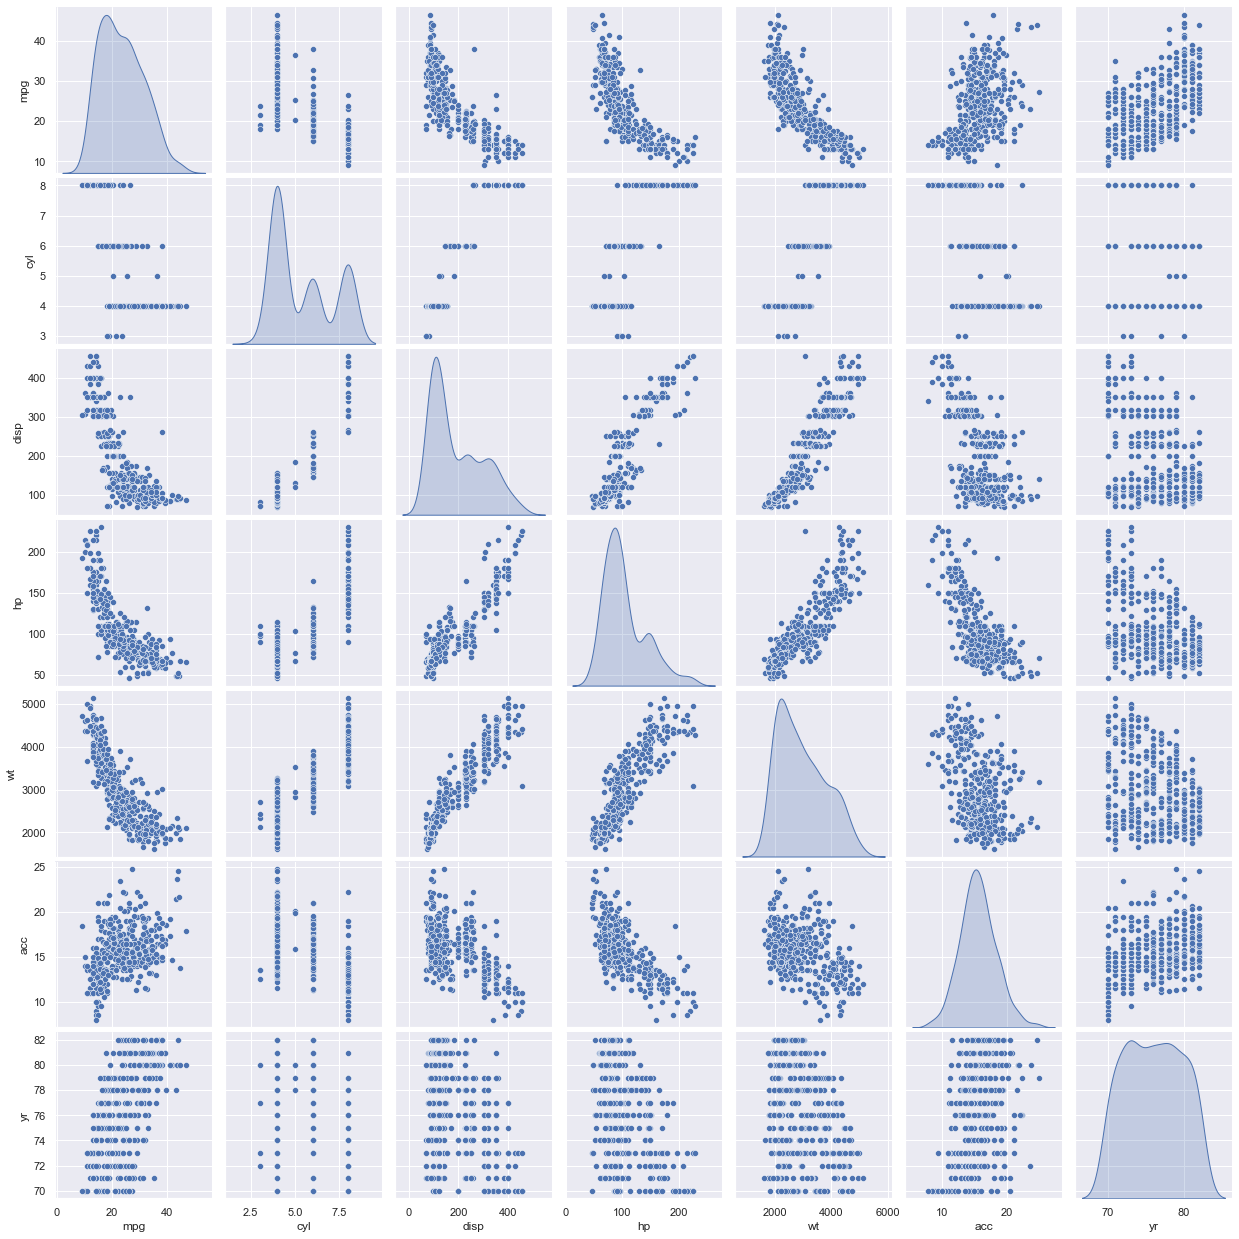

In [99]:
df_attr = df.iloc[:, 0:7]
sns.pairplot(df_attr, diag_kind='kde');

This pairplot gives an idea about the relationship between each attribute with other attributes.

### D. Visualize a scatterplot for ‘wt’ and ‘disp’. Datapoints should be distinguishable by ‘cyl’.

<AxesSubplot:xlabel='wt', ylabel='disp'>

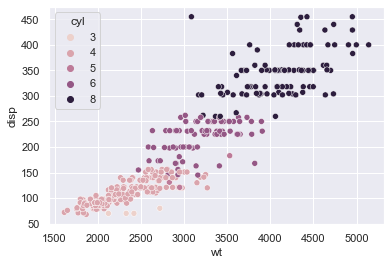

In [100]:
sns.scatterplot(data=df,x='wt',y='disp',hue='cyl')

This scatterplot depicts the relationship between "wt" and "disp" and datapoints are distinguishable by "cyl".

### E. Share insights for Q2.d.

This scatterplot depicts a positive relationship between "wt" and "disp". It is seen that as "wt" increases "disp" also increases.

### F. Visualize a scatterplot for ‘wt’ and ’mpg’. Datapoints should be distinguishable by ‘cyl’. 

<AxesSubplot:xlabel='wt', ylabel='mpg'>

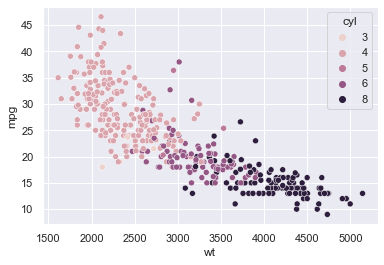

In [101]:
sns.scatterplot(data=df,x='wt',y='mpg',hue='cyl')

This scatterplot depicts the relationship between "wt" and "mpg" and datapoints are distinguishable by "cyl".

### G. Share insights for Q2.f. 

This scatterplot depicts a negative relationship between "wt" and "mpg". It is seen that as "wt" increases, "mpg" also decreases.

## 3. Clustering:

### A. Apply K-Means clustering for 2 to 10 clusters.

#### The dataset is being standardized using zscore funtion.

In [102]:
ndf = df.iloc[:,0:7] 
ndf_z1 = ndf.apply(zscore)
ndf_z1.head()

,mpg,cyl,disp,hp,wt,acc,yr
0,-0.706439,1.498191,1.090604,0.673118,0.630870,-1.295498,-1.627426
1,-1.090751,1.498191,1.503514,1.589958,0.854333,-1.477038,-1.627426
2,-0.706439,1.498191,1.196232,1.197027,0.550470,-1.658577,-1.627426
3,-0.962647,1.498191,1.061796,1.197027,0.546923,-1.295498,-1.627426
4,-0.834543,1.498191,1.042591,0.935072,0.565841,-1.840117,-1.627426


### 2 to 10 clusters :

In [103]:
k_means = KMeans(n_clusters = 2)
k_means.fit(ndf_z1)
labels = k_means.labels_

In [104]:
silhouette_score(ndf_z1,labels)

0.4823594610391611

In [105]:
kmeans_kwargs = {
   "init": "random",
   "n_init": 10,
   "max_iter": 300,
   "random_state": 42,
}


silhouette_coefficients = []

 # Notice you start at 2 clusters for silhouette coefficient
for k in range(2, 10):
    kmeans = KMeans(n_clusters=k, **kmeans_kwargs)
    kmeans.fit(ndf_z1)
    score = silhouette_score(ndf_z1,kmeans.labels_)
    silhouette_coefficients.append(score)

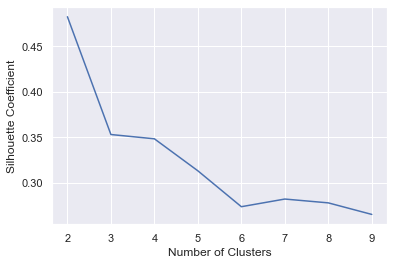

In [106]:
plt.plot(range(2, 10), silhouette_coefficients)
plt.xticks(range(2, 10))
plt.xlabel("Number of Clusters")
plt.ylabel("Silhouette Coefficient")
plt.show()

### B. Plot a visual and find elbow point

In [107]:
wss =[] 
for i in range(1,5):
    KM = KMeans(n_clusters=i)
    KM.fit(ndf_z1)
    wss.append(KM.inertia_)
wss

[2785.9999999999995, 1294.8418950727319, 946.0197908553791, 738.3923281527314]

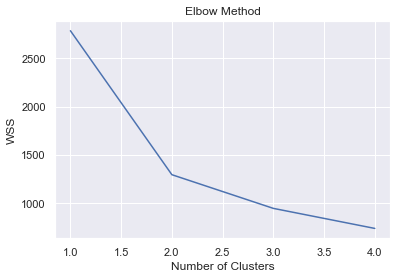

In [108]:
plt.plot(range(1,5), wss);
plt.title('Elbow Method');
plt.xlabel("Number of Clusters")
plt.ylabel("WSS");

### D. Train a K-means clustering model once again on the optimal number of clusters

Text(0.5, 1.0, 'Selecting k with the Elbow Method')

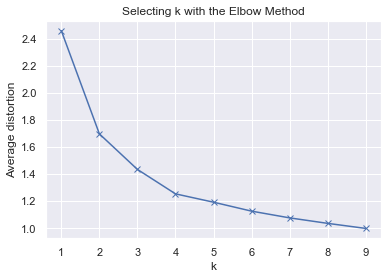

In [109]:
from scipy.spatial.distance import cdist
clusters=range(1,10)
meanDistortions=[]

for k in clusters:
    model=KMeans(n_clusters=k)
    model.fit(ndf_z1)
    prediction=model.predict(ndf_z1)
    meanDistortions.append(sum(np.min(cdist(ndf_z1, model.cluster_centers_, 'euclidean'), axis=1)) /ndf_z1
                           .shape[0])


plt.plot(clusters, meanDistortions, 'bx-')
plt.xlabel('k')
plt.ylabel('Average distortion')
plt.title('Selecting k with the Elbow Method')

### E. Add a new feature in the DataFrame which will have labels based upon cluster value. 

In [110]:
dfcop = df.copy()

In [111]:
ndf["cluster_K"] = labels
dfcop['cluster_K']=labels
Kclus=ndf
Kclus.head()

,mpg,cyl,disp,hp,wt,acc,yr,cluster_K
0,18.0,8,307.0,130.0,3504,12.0,70,1
1,15.0,8,350.0,165.0,3693,11.5,70,1
2,18.0,8,318.0,150.0,3436,11.0,70,1
3,16.0,8,304.0,150.0,3433,12.0,70,1
4,17.0,8,302.0,140.0,3449,10.5,70,1


In [112]:
ndf.cluster_K.value_counts().sort_index()

0    293
1    105
Name: cluster_K, dtype: int64

In [113]:
ndf_z1["cluster_K"] = labels
ndf_z1.head()

,mpg,cyl,disp,hp,wt,acc,yr,cluster_K
0,-0.706439,1.498191,1.090604,0.673118,0.630870,-1.295498,-1.627426,1
1,-1.090751,1.498191,1.503514,1.589958,0.854333,-1.477038,-1.627426,1
2,-0.706439,1.498191,1.196232,1.197027,0.550470,-1.658577,-1.627426,1
3,-0.962647,1.498191,1.061796,1.197027,0.546923,-1.295498,-1.627426,1
4,-0.834543,1.498191,1.042591,0.935072,0.565841,-1.840117,-1.627426,1


A new feature is added, That is cluster is divided into 0 and 1's

### F. Plot a visual and color the datapoints based upon clusters.

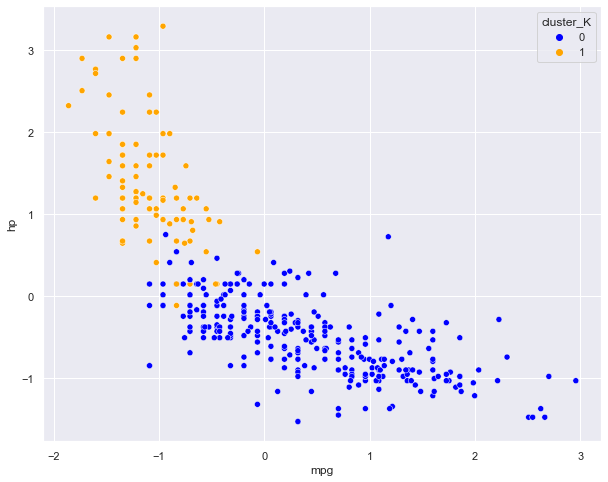

In [114]:
plt.figure(figsize=(10, 8))
sns.scatterplot(x="mpg", y="hp", hue="cluster_K",
              data=ndf_z1, 
                    palette=['blue','orange']);

The features "mpg" and "hp" of the dataset is plotted here ,and also differentiated by the clusters : 0s and 1s.

# PART B

#### DOMAIN: 

Automobile

#### CONTEXT: 

The purpose is to classify a given silhouette as one of three types of vehicle, using a set of features extracted from the silhouette. The vehicle may be viewed from one of many different angles.

#### DATA DESCRIPTION: 
The data contains features extracted from the silhouette of vehicles in different angles. Four "Corgie" model vehicles were used for the experiment: a double decker bus, Cheverolet van, Saab 9000 and an Opel Manta 400 cars. This particular combination of vehicles was chosen with the expectation that the bus, van and either one of the cars would be readily distinguishable, but it would be more difficult to distinguish between the cars.
#### All the features are numeric i.e. geometric features extracted from the silhouette.

#### PROJECT OBJECTIVE: Apply dimensionality reduction technique – PCA and train a model and compare relative results.

In [115]:
import numpy as np

import pandas as pd

import seaborn as sns

import matplotlib.pyplot as plt

plt.rc('font',size=14)
sns.set(style='white')
sns.set(style='whitegrid',color_codes=True)

%matplotlib inline

from sklearn.preprocessing import LabelEncoder

from sklearn.model_selection import cross_val_score

from scipy.stats import zscore

from sklearn.decomposition import PCA

from sklearn.linear_model import LogisticRegression 

from sklearn.svm import SVC

from sklearn.naive_bayes import GaussianNB

from sklearn.model_selection import train_test_split

from sklearn.model_selection import GridSearchCV

from sklearn import metrics

### 1.A. Read ‘vehicle.csv’ and save as DataFrame

In [116]:
df3 = pd.read_csv('vehicle.csv')
df3.head()

,compactness,circularity,distance_circularity,radius_ratio,pr.axis_aspect_ratio,max.length_aspect_ratio,scatter_ratio,elongatedness,pr.axis_rectangularity,max.length_rectangularity,scaled_variance,scaled_variance.1,scaled_radius_of_gyration,scaled_radius_of_gyration.1,skewness_about,skewness_about.1,skewness_about.2,hollows_ratio,class
0,95,48.0,83.0,178.0,72.0,10,162.0,42.0,20.0,159,176.0,379.0,184.0,70.0,6.0,16.0,187.0,197,van
1,91,41.0,84.0,141.0,57.0,9,149.0,45.0,19.0,143,170.0,330.0,158.0,72.0,9.0,14.0,189.0,199,van
2,104,50.0,106.0,209.0,66.0,10,207.0,32.0,23.0,158,223.0,635.0,220.0,73.0,14.0,9.0,188.0,196,car
3,93,41.0,82.0,159.0,63.0,9,144.0,46.0,19.0,143,160.0,309.0,127.0,63.0,6.0,10.0,199.0,207,van
4,85,44.0,70.0,205.0,103.0,52,149.0,45.0,19.0,144,241.0,325.0,188.0,127.0,9.0,11.0,180.0,183,bus


In [117]:
print("Shape of the original dataset:",df3.shape)

Shape of the original dataset: (846, 19)


### 1.D. Check for duplicate rows in the data and impute with correct approach.

In [118]:
dupes = df3.duplicated()
sum(dupes)

0

Checked for duplicated rows and columns. There is no such thing.

### 1.B. Check percentage of missing values and impute with correct approach.

In [119]:
df3.isnull().sum()

compactness                    0
circularity                    5
distance_circularity           4
radius_ratio                   6
pr.axis_aspect_ratio           2
max.length_aspect_ratio        0
scatter_ratio                  1
elongatedness                  1
pr.axis_rectangularity         3
max.length_rectangularity      0
scaled_variance                3
scaled_variance.1              2
scaled_radius_of_gyration      2
scaled_radius_of_gyration.1    4
skewness_about                 6
skewness_about.1               1
skewness_about.2               1
hollows_ratio                  0
class                          0
dtype: int64

In [120]:
percent_missing = df3.isnull().sum() * 100/len(df3)
missing_value = pd.DataFrame({'Column Name' : df3.columns,'Percentage_Missing' : percent_missing})
missing_value

,Column Name,Percentage_Missing
compactness,compactness,0.000000
circularity,circularity,0.591017
distance_circularity,distance_circularity,0.472813
radius_ratio,radius_ratio,0.709220
pr.axis_aspect_ratio,pr.axis_aspect_ratio,0.236407
max.length_aspect_ratio,max.length_aspect_ratio,0.000000
scatter_ratio,scatter_ratio,0.118203
elongatedness,elongatedness,0.118203
pr.axis_rectangularity,pr.axis_rectangularity,0.354610
max.length_rectangularity,max.length_rectangularity,0.000000


This displays the percentage of missing values in each column.

The missing values are then dropped.

In [121]:
df3 = pd.read_csv('vehicle.csv').dropna()

In [122]:
df3.shape

(813, 19)

In [123]:
print('The shape of the dataset after:',df3.shape)

The shape of the dataset after: (813, 19)


In [124]:
df3.describe().T

,count,mean,std,min,25%,50%,75%,max
compactness,813.0,93.656827,8.233751,73.0,87.0,93.0,100.0,119.0
circularity,813.0,44.803198,6.146659,33.0,40.0,44.0,49.0,59.0
distance_circularity,813.0,82.043050,15.783070,40.0,70.0,79.0,98.0,112.0
radius_ratio,813.0,169.098401,33.615402,104.0,141.0,167.0,195.0,333.0
pr.axis_aspect_ratio,813.0,61.774908,7.973000,47.0,57.0,61.0,65.0,138.0
max.length_aspect_ratio,813.0,8.599016,4.677174,2.0,7.0,8.0,10.0,55.0
scatter_ratio,813.0,168.563346,33.082186,112.0,146.0,157.0,198.0,265.0
elongatedness,813.0,40.988930,7.803380,26.0,33.0,43.0,46.0,61.0
pr.axis_rectangularity,813.0,20.558426,2.573184,17.0,19.0,20.0,23.0,29.0
max.length_rectangularity,813.0,147.891759,14.504648,118.0,137.0,146.0,159.0,188.0


In [125]:
df3.dtypes


compactness                      int64
circularity                    float64
distance_circularity           float64
radius_ratio                   float64
pr.axis_aspect_ratio           float64
max.length_aspect_ratio          int64
scatter_ratio                  float64
elongatedness                  float64
pr.axis_rectangularity         float64
max.length_rectangularity        int64
scaled_variance                float64
scaled_variance.1              float64
scaled_radius_of_gyration      float64
scaled_radius_of_gyration.1    float64
skewness_about                 float64
skewness_about.1               float64
skewness_about.2               float64
hollows_ratio                    int64
class                           object
dtype: object

In [126]:
df3['class']=df3['class'].astype('category')

In [127]:
df3.dtypes

compactness                       int64
circularity                     float64
distance_circularity            float64
radius_ratio                    float64
pr.axis_aspect_ratio            float64
max.length_aspect_ratio           int64
scatter_ratio                   float64
elongatedness                   float64
pr.axis_rectangularity          float64
max.length_rectangularity         int64
scaled_variance                 float64
scaled_variance.1               float64
scaled_radius_of_gyration       float64
scaled_radius_of_gyration.1     float64
skewness_about                  float64
skewness_about.1                float64
skewness_about.2                float64
hollows_ratio                     int64
class                          category
dtype: object

In [128]:
df3['class'].value_counts()

car    413
bus    205
van    195
Name: class, dtype: int64

##### There are 413 cars, 205 bus and 195 van.

### C. Visualize a Pie-chart and print percentage of values for variable ‘class’.

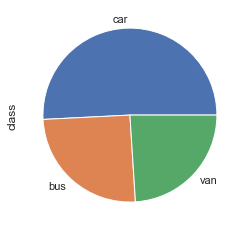

In [129]:
df3['class'].value_counts().head(10).plot.pie()

# Unsquish the pie.
import matplotlib.pyplot as plt
plt.gca().set_aspect('equal')

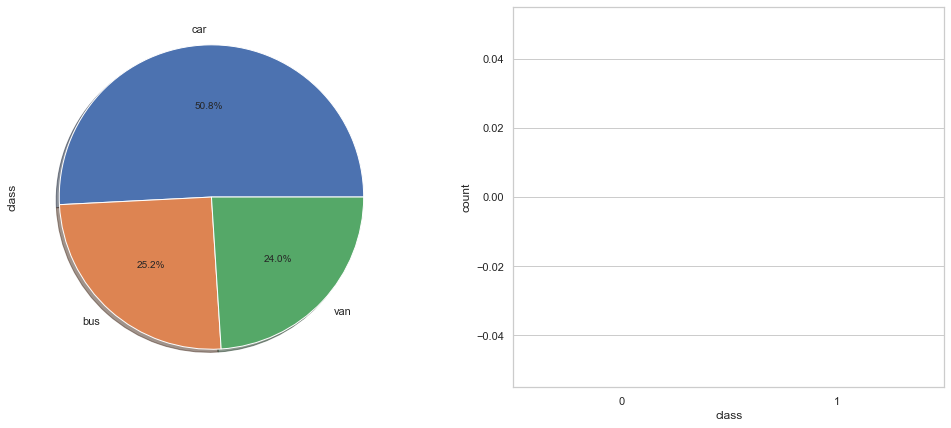

In [130]:
f,axes = plt.subplots(1,2,figsize = (17,7))
df3['class'].value_counts().plot.pie(autopct = '%1.1f%%',ax = axes[0],shadow = True)
sns.countplot('class',data = df3,ax=axes[1],order=[0,1])
plt.show()

Almost the car is 51% and the remaining is the bus and van.

## 2. Data Preparation: 

### A. Split data into X and Y. [Train and Test optional] 

In [131]:
labelencoder_X = LabelEncoder()
df3['class'] = labelencoder_X.fit_transform(df3['class'])

In [132]:
X=df3.iloc[:,0:18]
y = df3.iloc[:,18]

In [133]:
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.3, random_state = 10)

### B. Standardize the Data. 

In [134]:
X_z=X.apply(zscore)

## 3. Model Building: 

### A. Train a base Classification model using SVM. 

In [135]:
from sklearn.svm import SVC

svc_model = SVC(C=0.025, kernel='rbf', gamma=3) 

svc_model.fit(X_train, y_train)
# Model is fiT on the Trainign Data
prediction = svc_model.predict(X_test)

### B. Print Classification metrics for train data. 

In [136]:
print('Accuracy on Training Data',svc_model.score(X_train, y_train))
print('Accuracy on Testing Data',svc_model.score(X_test, y_test))

Accuracy on Training Data 0.5008787346221442
Accuracy on Testing Data 0.5245901639344263


Confusion Matrix


<AxesSubplot:>

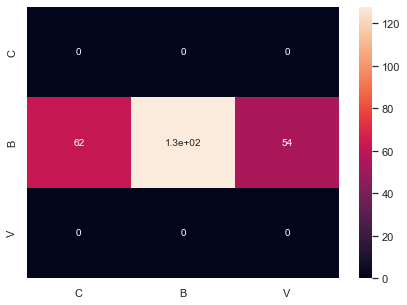

In [137]:
from sklearn import metrics

print("Confusion Matrix")
cm=metrics.confusion_matrix(prediction,y_test)

df_cm = pd.DataFrame(cm, index = [i for i in ["C","B",'V']],
                  columns = [i for i in ["C","B",'V']])
plt.figure(figsize = (7,5))
sns.heatmap(df_cm, annot=True)

In [138]:
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import MinMaxScaler
from scipy.stats import zscore
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score,confusion_matrix
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.metrics import classification_report
from sklearn import model_selection
import warnings
warnings.filterwarnings("ignore")

In [139]:
y_train.value_counts() 

1    285
0    143
2    141
Name: class, dtype: int64

In [140]:
print('Classification matrix:\n',classification_report(prediction,y_test))

Classification matrix:
               precision    recall  f1-score   support

           0       0.00      0.00      0.00         0
           1       1.00      0.52      0.69       244
           2       0.00      0.00      0.00         0

    accuracy                           0.52       244
   macro avg       0.33      0.17      0.23       244
weighted avg       1.00      0.52      0.69       244



### D. Visualize Cumulative Variance Explained with Number of Components. 

In [141]:
cov_m = np.cov(X_z.T)
print('Covariance Matrix \n%s', cov_m)

Covariance Matrix 
%s [[ 1.00123153  0.69073497  0.79092746  0.68897729  0.09066804  0.1505537
   0.81502868 -0.78902127  0.81522961  0.67573322  0.76532752  0.82125027
   0.58212123 -0.25875528  0.23193313  0.16859183  0.29656022  0.3732647 ]
 [ 0.69073497  1.00123153  0.79868656  0.62471862  0.15521415  0.25192897
   0.85920548 -0.8261242   0.85719089  0.96655501  0.80710097  0.85197956
   0.93674669  0.0491303   0.1419004  -0.00197723 -0.1140426   0.04939203]
 [ 0.79092746  0.79868656  1.00123153  0.77235395  0.16358689  0.26591783
   0.91014241 -0.9138366   0.89836576  0.77441118  0.86674929  0.89288735
   0.70655787 -0.23843852  0.11041593  0.278193    0.14543699  0.34365085]
 [ 0.68897729  0.62471862  0.77235395  1.00123153  0.66819724  0.45301698
   0.74438595 -0.79674104  0.71709175  0.57118076  0.80778118  0.73267385
   0.54530637 -0.17556405  0.04474816  0.17829807  0.37605357  0.47147529]
 [ 0.09066804  0.15521415  0.16358689  0.66819724  1.00123153  0.6528959
   0.11383635 

In [142]:
eigenvalues, eigenvectors = np.linalg.eig(cov_m)
print('Eigen Vectors \n%s', eigenvectors)
print('\n Eigen Values \n%s', eigenvalues)

Eigen Vectors 
%s [[ 2.74447428e-01  1.27105989e-01 -1.15778231e-01 -8.00766389e-02
   7.01971756e-02  1.41269187e-01  4.78882430e-01 -5.51289488e-01
   4.70291162e-01  2.71011706e-01 -3.88480982e-02  3.37118452e-02
   1.68590056e-01 -4.08522941e-02  3.33699383e-02  4.49941671e-02
  -8.72862091e-03  4.27500161e-04]
 [ 2.94003600e-01 -1.34430321e-01 -3.64513515e-02 -1.90342131e-01
  -8.66726774e-02 -2.78132128e-01 -2.32112671e-01 -1.77146565e-01
   8.14934003e-03 -8.72464933e-02  1.10855608e-02 -1.12606467e-01
  -6.30087058e-02  1.60416148e-01 -4.20446984e-01  6.57048309e-01
  -1.69794331e-01  1.73650656e-02]
 [ 3.04380218e-01  7.21448351e-02 -5.51881577e-02  6.93709791e-02
   3.89590342e-02 -1.36322721e-01  6.01737282e-02  4.36495932e-01
   1.76997855e-01  2.14799970e-01 -7.02546566e-01 -2.85482662e-02
  -2.16299609e-01 -2.13651022e-01 -1.19627607e-01 -2.21685599e-02
   2.86460253e-02 -1.13772044e-02]
 [ 2.68888600e-01  1.76416250e-01  2.81804540e-01  4.46505645e-02
  -4.36633252e-02  

In [143]:
eigen_pairs = [(np.abs(eigenvalues[i]), eigenvectors[:,i]) for i in range(len(eigenvalues))]
eigen_pairs.sort(reverse=True)
eigen_pairs[:]

[(9.453386999070814,
  array([ 0.27444743,  0.2940036 ,  0.30438022,  0.2688886 ,  0.08301999,
          0.09848255,  0.31668895, -0.31320505,  0.31361223,  0.28128567,
          0.30916156,  0.31416351,  0.27033732, -0.02560369,  0.03967995,
          0.06316001,  0.03094103,  0.07936613])),
 (2.989618875111065,
  array([ 0.12710599, -0.13443032,  0.07214484,  0.17641625,  0.09876335,
         -0.03020685, -0.04438994, -0.01525397, -0.0572306 , -0.12032438,
         -0.06190968, -0.0480211 , -0.2101697 , -0.4937938 ,  0.05626019,
          0.12103543,  0.5444917 ,  0.53888165])),
 (1.917687210127202,
  array([-0.11577823, -0.03645135, -0.05518816,  0.28180454,  0.64576888,
          0.58641235, -0.09858482,  0.05665152, -0.11203925, -0.02413247,
          0.05972347, -0.10945278, -0.0370631 ,  0.27577954, -0.11019178,
         -0.08049935,  0.031728  ,  0.05694625])),
 (1.1701169611149134,
  array([-0.08007664, -0.19034213,  0.06937098,  0.04465056, -0.03005322,
         -0.0297503 , 

Cumulative Variance Explained [ 52.45421787  69.04278236  79.68349586  86.17614977  91.33143713
  94.2843067   96.27670728  97.51052572  98.3766432   98.89167071
  99.24417716  99.49049637  99.68338315  99.80107333  99.89049256
  99.96322521  99.99796993 100.        ]


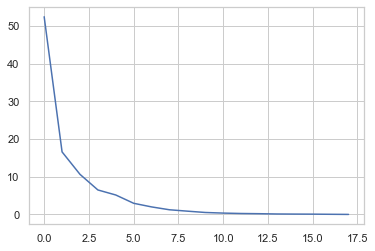

In [144]:
tot = sum(eigenvalues)
var_exp = [( i /tot ) * 100 for i in sorted(eigenvalues, reverse=True)]
cum_var_exp = np.cumsum(var_exp)
print("Cumulative Variance Explained", cum_var_exp)
plt.plot(var_exp)

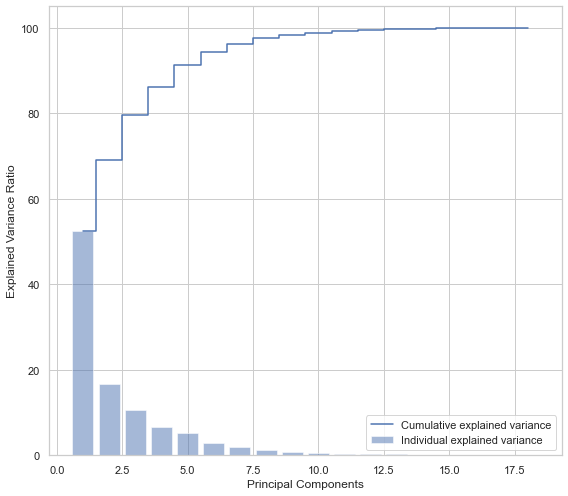

In [145]:
plt.figure(figsize=(8 , 7))
plt.bar(range(1, eigenvalues.size + 1), var_exp, alpha = 0.5, align = 'center', label = 'Individual explained variance')
plt.step(range(1, eigenvalues.size + 1), cum_var_exp, where='mid', label = 'Cumulative explained variance')
plt.ylabel('Explained Variance Ratio')
plt.xlabel('Principal Components')
plt.legend(loc = 'best')
plt.tight_layout()
plt.show()

This graph is between principal components and Variance ratio.

##### It is seen that  last 7 principal components can be eliminated from a total of 17, because almost 98.5% of the data is captured by 10 principal components.

### F. Apply PCA on the data. This time Select Minimum Components with 90% or above variance explained. 

#### The Minimum Components = 10

In [146]:
pca = PCA(n_components=10)
data_reduced = pca.fit_transform(X_z)
data_reduced.transpose()

array([[ 0.35224921, -1.5780723 ,  3.78255625, ...,  4.83112974,
        -3.26941568, -4.75521696],
       [-0.14102681, -0.4221973 ,  0.25325744, ...,  0.07323619,
        -1.01866536,  0.30767001],
       [ 0.96183193, -0.36526142,  0.06175618, ...,  0.48997353,
        -0.34344083, -0.58216391],
       ...,
       [-0.38832347,  0.25832407,  0.4788957 , ...,  0.12766991,
         0.31487696, -0.23686544],
       [-0.9081888 ,  0.13788287, -0.27596753, ..., -0.61546869,
        -0.22022929, -0.45108813],
       [ 0.08723554, -0.09329092, -0.47740075, ...,  0.54772524,
        -0.88751729, -0.31389843]])

In [147]:
X_comp = pd.DataFrame(pca.components_,columns=list(X_z))
X_comp.head()

,compactness,circularity,distance_circularity,radius_ratio,pr.axis_aspect_ratio,max.length_aspect_ratio,scatter_ratio,elongatedness,pr.axis_rectangularity,max.length_rectangularity,scaled_variance,scaled_variance.1,scaled_radius_of_gyration,scaled_radius_of_gyration.1,skewness_about,skewness_about.1,skewness_about.2,hollows_ratio
0,0.274447,0.294004,0.304380,0.268889,0.083020,0.098483,0.316689,-0.313205,0.313612,0.281286,0.309162,0.314164,0.270337,-0.025604,0.039680,0.063160,0.030941,0.079366
1,-0.127106,0.134430,-0.072145,-0.176416,-0.098763,0.030207,0.044390,0.015254,0.057231,0.120324,0.061910,0.048021,0.210170,0.493794,-0.056260,-0.121035,-0.544492,-0.538882
2,-0.115778,-0.036451,-0.055188,0.281805,0.645769,0.586412,-0.098585,0.056652,-0.112039,-0.024132,0.059723,-0.109453,-0.037063,0.275780,-0.110192,-0.080499,0.031728,0.056946
3,0.080077,0.190342,-0.069371,-0.044651,0.030053,0.029750,-0.094417,0.085067,-0.091897,0.192294,-0.119476,-0.091318,0.204887,-0.071533,0.605083,-0.662058,0.101853,0.051579
4,0.070197,-0.086673,0.038959,-0.043663,-0.038468,0.212001,-0.017016,0.075823,0.000739,-0.064243,0.002564,-0.019443,-0.063195,0.149127,0.729058,0.599762,-0.094108,-0.028860


In [148]:
P_r = np.array(eigenvectors[0:10])   
# projecting original data into principal component dimensions
X_std_10D = np.dot(X_z,P_r.T)   
# converting array to dataframe for pairplot
P_data_df = pd.DataFrame(X_std_10D)  

### G. Train SVM model on components selected from above step.

In [149]:
X_train, X_test, y_train, y_test = train_test_split(P_data_df,y, test_size = 0.3, random_state = 10)

In [150]:
from sklearn.svm import SVC
# SVC function is imported from sklearn.
# kernel ='rbf' specifies that there is no kernel used.
svc_model = SVC(C=0.1, kernel='rbf', gamma=1) # Parameters are set

svc_model.fit(X_train, y_train)
# Model is fir on the Trainign Data
prediction = svc_model.predict(X_test)
#labels are predicted based on X_test values

In [151]:
print(svc_model.score(X_train, y_train))
print(svc_model.score(X_test, y_test))

0.5694200351493849
0.569672131147541


### A. Train another SVM on the components out of PCA. Tune the parameters to improve performance

In [152]:
from sklearn.svm import SVC
# SVC function is imported from sklearn.
# kernel ='rbf' specifies that there is no kernel used.
svc_model = SVC(C=0.1, kernel='linear', gamma=1) # Parameters are set

svc_model.fit(X_train, y_train)
# Model is fir on the Trainign Data
prediction = svc_model.predict(X_test)
#labels are predicted based on X_test values

In [153]:
print('Accuracy of Training Data',svc_model.score(X_train, y_train))
print('Accuracy of Testing Data',svc_model.score(X_test, y_test))

Accuracy of Training Data 0.8857644991212654
Accuracy of Testing Data 0.8811475409836066


In [154]:
from sklearn.svm import SVC

# Building a Support Vector Machine on train data
svc_model = SVC(C=0.1, kernel='linear', gamma=1)
svc_model.fit(X_train, y_train)

prediction = svc_model.predict(X_test)

In [155]:
print('Acuuracy of Training Data',svc_model.score(X_train, y_train))
print('Accuracy of Testing Data',svc_model.score(X_test, y_test))

Acuuracy of Training Data 0.8857644991212654
Accuracy of Testing Data 0.8811475409836066


Confusion Matrix


<AxesSubplot:>

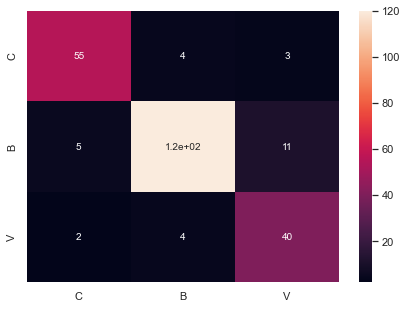

In [156]:
from sklearn import metrics

print("Confusion Matrix")
cm=metrics.confusion_matrix(prediction,y_test)

df_cm = pd.DataFrame(cm, index = [i for i in ['C','B','V']],
                  columns = [i for i in ['C','B','V']])
plt.figure(figsize = (7,5))
sns.heatmap(df_cm, annot=True)

### The accuracy has improved from 57% to 89% after tuning the model.

## 5. Data Understanding & Cleaning:

### A. Explain pre-requisite/assumptions of PCA.

The assumptions in PCA are:

1. The principal component with high variance are assumed as to be paid attention by the PCA.

2. There must be linearity in the data set.

3. There must be a correlation in the feature dataset and also the reduced dataset will be represented with fewer dimensions.

4. Deviated values are called as outliers and should be less. More outliers means more errors.

### B. Explain advantages and limitations of PCA.

#### Advantages:

1. The PCA technique is used when you have to reduce the number of features or dimensions in the data.

2. The PCA technique is used when you have to check whether the features are independent of each other or not.

##### Limitations:

1. Independent variables are less interpretable.

2. The data must be standardised before PCA is applied.

3. There is a loss of information.

# THE END